In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis
import dtale
import statsmodels.graphics.tsaplots as tsa_plots
# from sklearn.metrics import mean_squared_error
# from math import sqrt
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv(r'D:\internship\360DigiriTmg\Machine Downtime.csv')

In [3]:
data

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,01-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


In [4]:
data.count()

Date                               2500
Machine_ID                         2500
Assembly_Line_No                   2500
Hydraulic_Pressure(bar)            2490
Coolant_Pressure(bar)              2481
Air_System_Pressure(bar)           2483
Coolant_Temperature                2488
Hydraulic_Oil_Temperature(°C)      2484
Spindle_Bearing_Temperature(°C)    2493
Spindle_Vibration(µm)              2489
Tool_Vibration(µm)                 2489
Spindle_Speed(RPM)                 2494
Voltage(volts)                     2494
Torque(Nm)                         2479
Cutting(kN)                        2493
Downtime                           2500
dtype: int64

In [5]:
# Check for missing values and handle them if necessary
data.isnull().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64
 9   Spindle_Vibration(µm)            2489 non-null   float64
 10  Tool_Vibration(µm)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [7]:
data.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


In [8]:
numeric_columns = data.select_dtypes(include=[np.number]).columns

In [9]:
# measure sum of mean
data[numeric_columns].mean().sum()

20892.32524195248

In [10]:
# measure sum of Standard deviation 
data[numeric_columns].std().sum()

3959.3532858078283

In [11]:
# measure sum of max value
data[numeric_columns].max().sum()

28962.632391528

In [12]:
# measure sum of min value
data[numeric_columns].min().sum()

258.46202585500004

In [13]:
# measure sum of max - min value
data[numeric_columns].max().sum() - data[numeric_columns].min().sum()

28704.170365673002

In [14]:
# Measure skewness
skewness = data[numeric_columns].skew()
skewness

Hydraulic_Pressure(bar)            0.197076
Coolant_Pressure(bar)              0.147081
Air_System_Pressure(bar)          -0.052899
Coolant_Temperature                0.108301
Hydraulic_Oil_Temperature(°C)     -0.002291
Spindle_Bearing_Temperature(°C)   -0.035942
Spindle_Vibration(µm)              0.001532
Tool_Vibration(µm)                -0.061005
Spindle_Speed(RPM)                -0.172475
Voltage(volts)                    -0.028658
Torque(Nm)                         0.030578
Cutting(kN)                        0.113963
dtype: float64

In [15]:
# measure sum of skewness values
data[numeric_columns].skew().sum()

0.24526061391418916

In [16]:
# measure kurtosis values
kurtosis = data[numeric_columns].kurtosis()
kurtosis

Hydraulic_Pressure(bar)           -0.920292
Coolant_Pressure(bar)              1.169455
Air_System_Pressure(bar)          -0.001578
Coolant_Temperature                1.564639
Hydraulic_Oil_Temperature(°C)      0.038164
Spindle_Bearing_Temperature(°C)   -0.043862
Spindle_Vibration(µm)             -0.018718
Tool_Vibration(µm)                 0.006451
Spindle_Speed(RPM)                 1.344769
Voltage(volts)                    -0.090328
Torque(Nm)                        -0.465628
Cutting(kN)                       -1.087171
dtype: float64

In [17]:
# measure sum of kurtosis values
data[numeric_columns].kurtosis().sum()

1.4958999942040827

In [18]:
# Select only the numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['float64', 'int64'])


In [19]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

In [20]:
numerical_columns.corr().sum()

Hydraulic_Pressure(bar)            0.646032
Coolant_Pressure(bar)              1.079735
Air_System_Pressure(bar)           1.069663
Coolant_Temperature                1.062847
Hydraulic_Oil_Temperature(°C)      1.012863
Spindle_Bearing_Temperature(°C)    1.045866
Spindle_Vibration(µm)              0.992831
Tool_Vibration(µm)                 0.998447
Spindle_Speed(RPM)                 1.120345
Voltage(volts)                     1.059560
Torque(Nm)                         0.656175
Cutting(kN)                        0.976667
dtype: float64

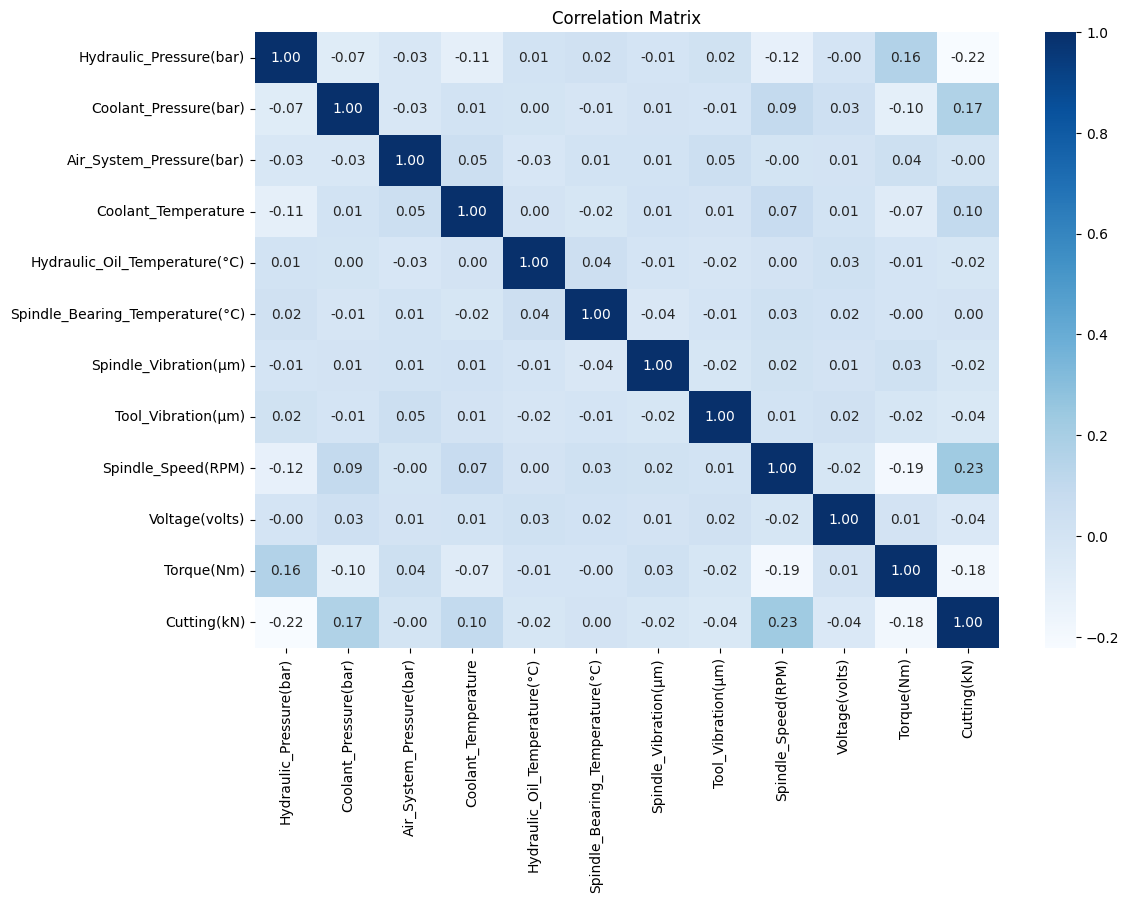

<Figure size 640x480 with 0 Axes>

In [21]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
plt.savefig("3.png")

In [22]:
plt.savefig("2.png")

<Figure size 640x480 with 0 Axes>

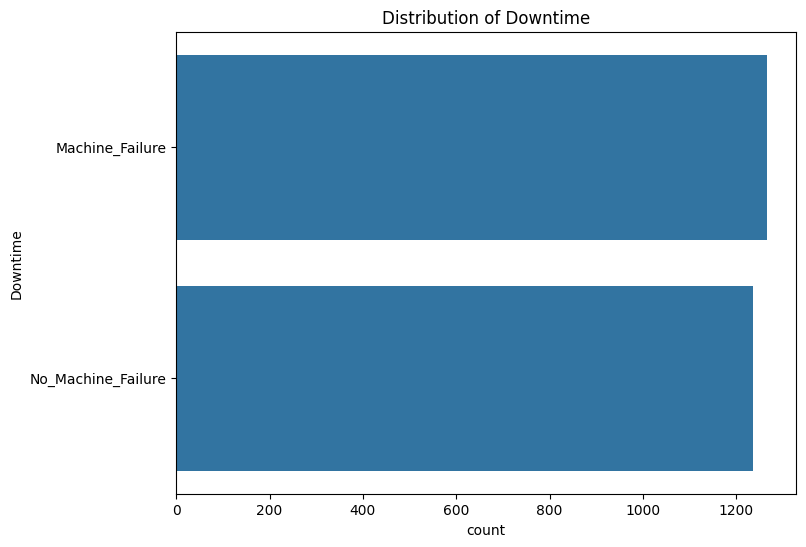

In [23]:
# Distribution of Downtime
plt.figure(figsize=(8, 6))
sns.countplot(y='Downtime', data=data, orient='h')
plt.title('Distribution of Downtime')
plt.show()

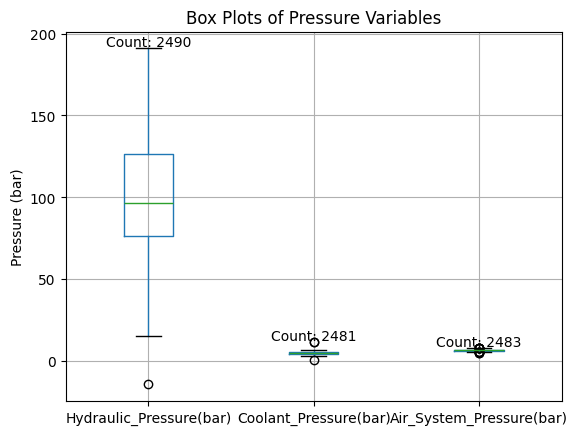

In [24]:
# Box plots
data.boxplot(column=['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)'])
plt.ylabel('Pressure (bar)')
plt.title('Box Plots of Pressure Variables')

# Define the list of pressure variables
pressure_variables = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)']

for i, variable in enumerate(pressure_variables):
    count = data[variable].count()
    plt.text(i + 1, data[variable].max() + 1, f'Count: {count}', ha='center', fontsize=10)
plt.show()

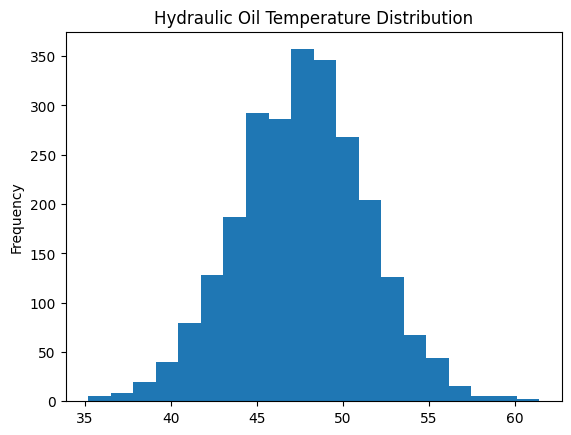

In [25]:
# Histograms
data['Hydraulic_Oil_Temperature(°C)'].plot(kind='hist', bins=20)
plt.title('Hydraulic Oil Temperature Distribution')
plt.show()

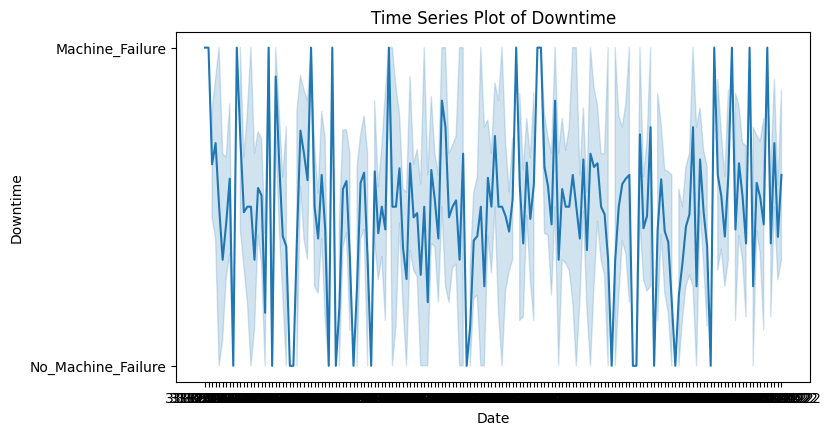

In [26]:
# Time Series Plots
plt.figure(figsize=(18, 10))
plt.subplot(2, 2, 3)
sns.lineplot(data=data, x='Date', y='Downtime')
plt.title('Time Series Plot of Downtime')
plt.xlabel('Date')
plt.ylabel('Downtime')

plt.show()

In [27]:
# Check for missing values and handle them if necessary
data.isnull().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [28]:
# Replace missing values with the mean of the respective column
data['Hydraulic_Pressure(bar)'].fillna(data['Hydraulic_Pressure(bar)'].mean(), inplace=True)
data['Coolant_Pressure(bar)'].fillna(data['Coolant_Pressure(bar)'].mean(), inplace=True)
data['Air_System_Pressure(bar)'].fillna(data['Air_System_Pressure(bar)'].mean(), inplace=True)
data['Coolant_Temperature'].fillna(data['Coolant_Temperature'].mean(), inplace=True)
data['Hydraulic_Oil_Temperature(°C)'].fillna(data['Hydraulic_Oil_Temperature(°C)'].mean(), inplace=True)
data['Spindle_Bearing_Temperature(°C)'].fillna(data['Spindle_Bearing_Temperature(°C)'].mean(), inplace=True)
data['Spindle_Vibration(µm)'].fillna(data['Spindle_Vibration(µm)'].mean(), inplace=True)
data['Tool_Vibration(µm)'].fillna(data['Tool_Vibration(µm)'].mean(), inplace=True)
data['Spindle_Speed(RPM)'].fillna(data['Spindle_Speed(RPM)'].mean(), inplace=True)
data['Voltage(volts)'].fillna(data['Voltage(volts)'].mean(), inplace=True)
data['Torque(Nm)'].fillna(data['Torque(Nm)'].mean(), inplace=True)
data['Cutting(kN)'].fillna(data['Cutting(kN)'].mean(), inplace=True)

In [29]:
# Check for missing values and handle them if necessary
data.isnull().sum()

Date                               0
Machine_ID                         0
Assembly_Line_No                   0
Hydraulic_Pressure(bar)            0
Coolant_Pressure(bar)              0
Air_System_Pressure(bar)           0
Coolant_Temperature                0
Hydraulic_Oil_Temperature(°C)      0
Spindle_Bearing_Temperature(°C)    0
Spindle_Vibration(µm)              0
Tool_Vibration(µm)                 0
Spindle_Speed(RPM)                 0
Voltage(volts)                     0
Torque(Nm)                         0
Cutting(kN)                        0
Downtime                           0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Assembly_Line_No'] = label_encoder.fit_transform(data['Assembly_Line_No'])
data['Assembly_Line_No']

0       0
1       0
2       2
3       1
4       0
       ..
2495    0
2496    0
2497    1
2498    2
2499    1
Name: Assembly_Line_No, Length: 2500, dtype: int32

In [31]:
label_encoder = LabelEncoder()
data['Machine_ID'] = label_encoder.fit_transform(data['Machine_ID'])
data['Machine_ID']

0       0
1       0
2       2
3       1
4       0
       ..
2495    0
2496    0
2497    1
2498    2
2499    1
Name: Machine_ID, Length: 2500, dtype: int32

In [32]:
label_encoder = LabelEncoder()
data['Downtime'] = label_encoder.fit_transform(data['Downtime'])
data['Downtime']

0       0
1       0
2       0
3       0
4       0
       ..
2495    1
2496    1
2497    1
2498    1
2499    0
Name: Downtime, Length: 2500, dtype: int32

In [33]:
data.drop_duplicates()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,0,0,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.580000,0
1,31-12-2021,0,0,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.680000,0
2,31-12-2021,2,2,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.550000,0
3,31-05-2022,1,1,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.550000,0
4,31-03-2022,0,0,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.550000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,01-02-2022,0,0,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.720000,1
2496,01-02-2022,0,0,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.940000,1
2497,01-02-2022,1,1,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,2.782551,1
2498,01-02-2022,2,2,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.790000,1


In [34]:
data.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [35]:
pd.get_dummies(data)

,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),...,Date_29-05-2022,Date_29-12-2021,Date_30-01-2022,Date_30-03-2022,Date_30-04-2022,Date_30-12-2021,Date_31-01-2022,Date_31-03-2022,Date_31-05-2022,Date_31-12-2021
0,0,0,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,...,False,False,False,False,False,False,False,False,False,True
1,0,0,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,...,False,False,False,False,False,False,False,False,False,True
2,2,2,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,...,False,False,False,False,False,False,False,False,False,True
3,1,1,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,...,False,False,False,False,False,False,False,False,True,False
4,0,0,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,...,False,False,False,False,False,False,False,False,False,False
2496,0,0,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,...,False,False,False,False,False,False,False,False,False,False
2497,1,1,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,...,False,False,False,False,False,False,False,False,False,False
2498,2,2,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,...,False,False,False,False,False,False,False,False,False,False


In [36]:
# Type Casting
data['Date'] = pd.to_datetime(data['Date'])
data['Hydraulic_Pressure(bar)'] = pd.to_numeric(data['Hydraulic_Pressure(bar)'])
data['Coolant_Pressure(bar)'] = pd.to_numeric(data['Coolant_Pressure(bar)'])
data['Air_System_Pressure(bar)'] = pd.to_numeric(data['Air_System_Pressure(bar)'])
data['Coolant_Temperature'] = pd.to_numeric(data['Coolant_Temperature'])
data['Hydraulic_Oil_Temperature(Â°C)'] = pd.to_numeric(data['Hydraulic_Oil_Temperature(°C)'])
data['Spindle_Bearing_Temperature(Â°C)'] = pd.to_numeric(data['Spindle_Bearing_Temperature(°C)'])
data['Spindle_Vibration(Âµm)'] = pd.to_numeric(data['Spindle_Vibration(µm)'])
data['Tool_Vibration(Âµm)'] = pd.to_numeric(data['Tool_Vibration(µm)'])
data['Spindle_Speed(RPM)'] = pd.to_numeric(data['Spindle_Speed(RPM)'])
data['Voltage(volts)'] = pd.to_numeric(data['Voltage(volts)'])
data['Torque(Nm)'] = pd.to_numeric(data['Torque(Nm)'])
data['Cutting(kN)'] = pd.to_numeric(data['Cutting(kN)'])

C:\Users\Praful\AppData\Local\Temp\ipykernel_4944\2896080988.py:2: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [60]:
from scipy import stats

z_scores = np.abs(stats.zscore(data['Hydraulic_Pressure(bar)']))
threshold = 3

z_scores

0       1.004847
1       0.791491
2       1.002200
3       1.255052
4       1.353262
          ...   
2495    0.374105
2496    0.055507
2497    0.570238
2498    1.470647
2499    0.156144
Name: Hydraulic_Pressure(bar), Length: 2500, dtype: float64

In [61]:
outliers = data[(z_scores > threshold)]
outliers

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime,Hydraulic_Oil_Temperature(Â°C),Spindle_Bearing_Temperature(Â°C),Spindle_Vibration(Âµm),Tool_Vibration(Âµm)
2058,2022-02-06,2,2,-14.326454,5.067261,6.163999,6.8,49.6,39.2,1.627,17.723,20386.0,348.0,33.923365,2.73,1,49.6,39.2,1.627,17.723


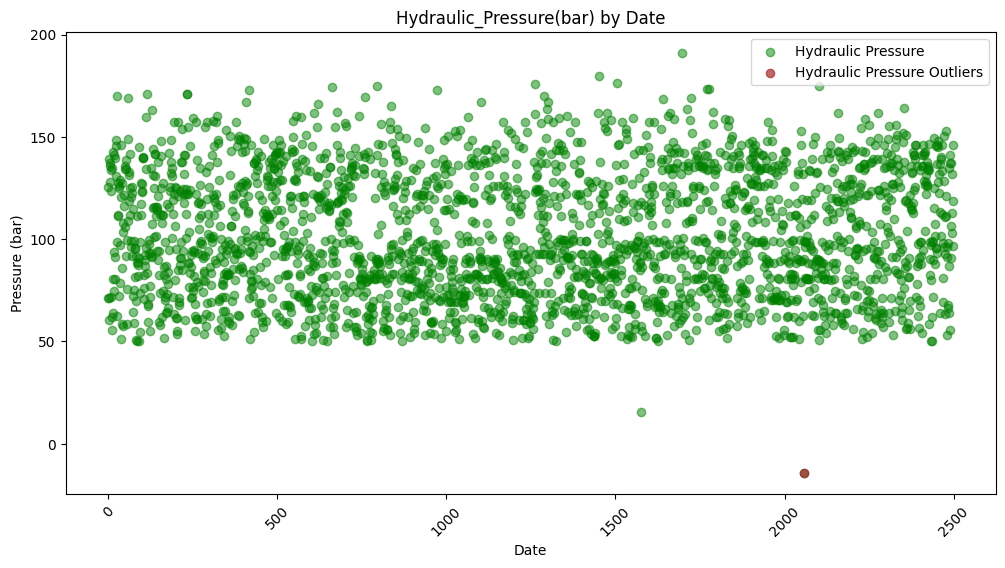

In [38]:
# Assuming 'data' is your DataFrame containing the relevant columns

plt.figure(figsize=(12, 6))

# Scatter plot of Hydraulic Pressure over time
plt.scatter(data.index, data['Hydraulic_Pressure(bar)'], label='Hydraulic Pressure', color='green', alpha=0.5)

# If you have outliers (assuming 'outliers' is a DataFrame containing the outliers), you can highlight them in red
plt.scatter(outliers.index, outliers['Hydraulic_Pressure(bar)'], color='brown', label='Hydraulic Pressure Outliers', alpha=0.7)


plt.title("Hydraulic_Pressure(bar) by Date")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Pressure (bar)")
plt.legend()
plt.show()

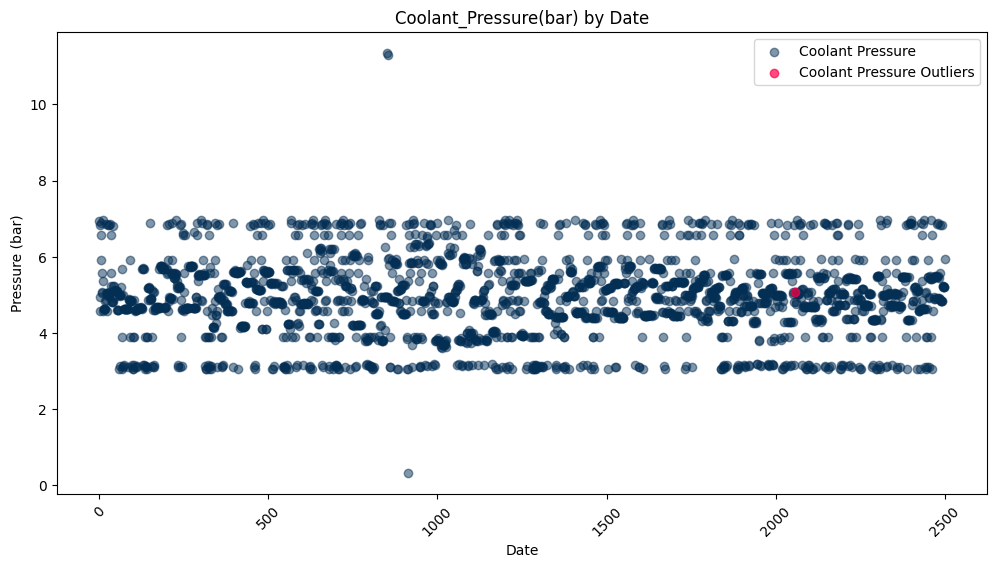

In [39]:
# Assuming 'data' is your DataFrame containing the relevant columns

plt.figure(figsize=(12, 6))

# Scatter plot of Coolant Pressure over time
plt.scatter(data.index, data['Coolant_Pressure(bar)'], label='Coolant Pressure', color='#042F55', alpha=0.5)


# If you have outliers (assuming 'outliers' is a DataFrame containing the outliers), you can highlight them in red
plt.scatter(outliers.index, outliers['Coolant_Pressure(bar)'], color='#FF0049', label='Coolant Pressure Outliers', alpha=0.7)

plt.title("Coolant_Pressure(bar) by Date")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Pressure (bar)")
plt.legend()
plt.show()

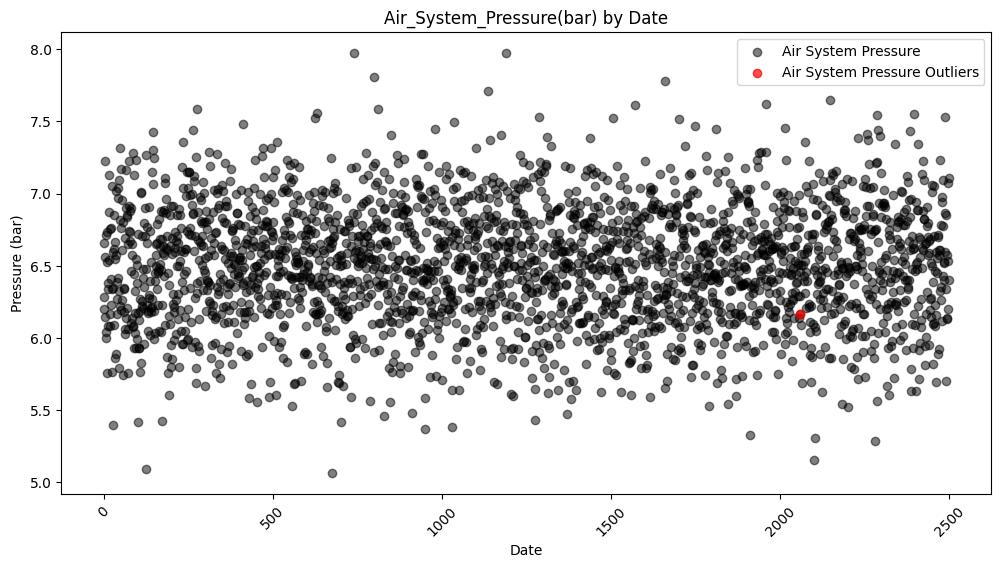

In [40]:
# Assuming 'data' is your DataFrame containing the relevant columns

plt.figure(figsize=(12, 6))

# Scatter plot of Air System Pressure over time
plt.scatter(data.index, data['Air_System_Pressure(bar)'], label='Air System Pressure', color='black', alpha=0.5)

# If you have outliers (assuming 'outliers' is a DataFrame containing the outliers), you can highlight them in red
plt.scatter(outliers.index, outliers['Air_System_Pressure(bar)'], color='red', label='Air System Pressure Outliers', alpha=0.7)

plt.title("Air_System_Pressure(bar) by Date")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Pressure (bar)")
plt.legend()
plt.show()

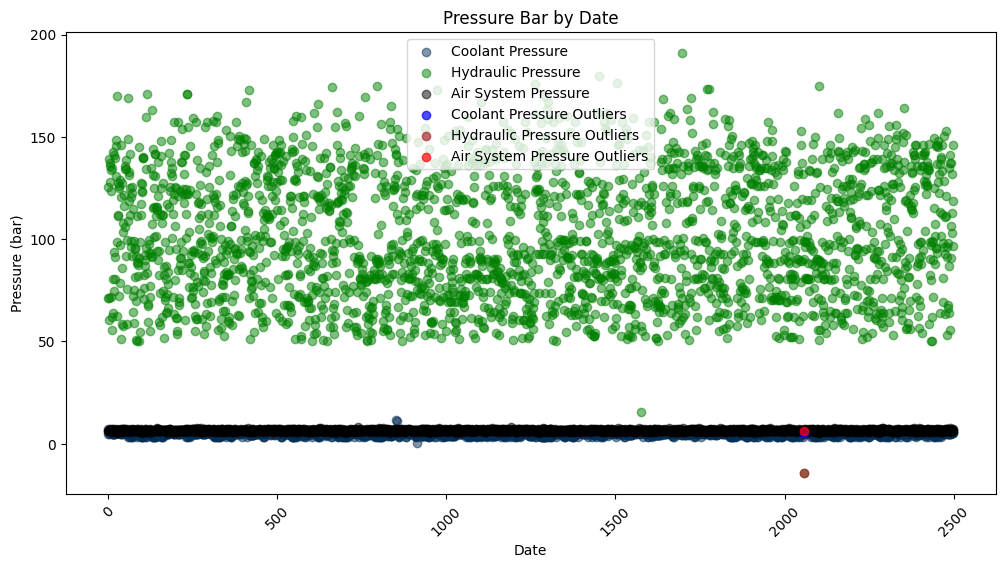

In [41]:
plt.figure(figsize=(12, 6))

# Scatter plot of Coolant Pressure over time
plt.scatter(data.index, data['Coolant_Pressure(bar)'], label='Coolant Pressure', color='#042F55', alpha=0.5)

# Scatter plot of Hydraulic Pressure over time
plt.scatter(data.index, data['Hydraulic_Pressure(bar)'], label='Hydraulic Pressure', color='green', alpha=0.5)

# Scatter plot of Air System Pressure over time
plt.scatter(data.index, data['Air_System_Pressure(bar)'], label='Air System Pressure', color='black', alpha=0.5)

# If you have outliers (assuming 'outliers' is a DataFrame containing the outliers), you can highlight them in red
plt.scatter(outliers.index, outliers['Coolant_Pressure(bar)'], color='blue', label='Coolant Pressure Outliers', alpha=0.7)
plt.scatter(outliers.index, outliers['Hydraulic_Pressure(bar)'], color='brown', label='Hydraulic Pressure Outliers', alpha=0.7)
plt.scatter(outliers.index, outliers['Air_System_Pressure(bar)'], color='red', label='Air System Pressure Outliers', alpha=0.7)

plt.title("Pressure Bar by Date")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Pressure (bar)")
plt.legend()
plt.show()

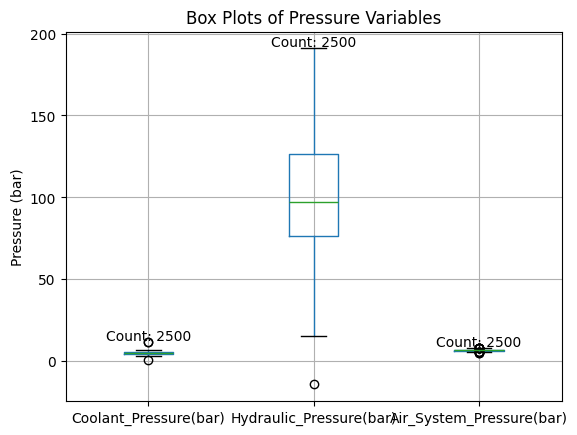

In [42]:
# Box plots

data.boxplot(column=['Coolant_Pressure(bar)','Hydraulic_Pressure(bar)', 'Air_System_Pressure(bar)'])
plt.ylabel('Pressure (bar)')
plt.title('Box Plots of Pressure Variables')

# Define the list of pressure variables
pressure_variables = ['Coolant_Pressure(bar)','Hydraulic_Pressure(bar)','Air_System_Pressure(bar)']

for i, variable in enumerate(pressure_variables):
    count = data[variable].count()
    plt.text(i + 1, data[variable].max() + 1, f'Count: {count}', ha='center', fontsize=10)
plt.show()

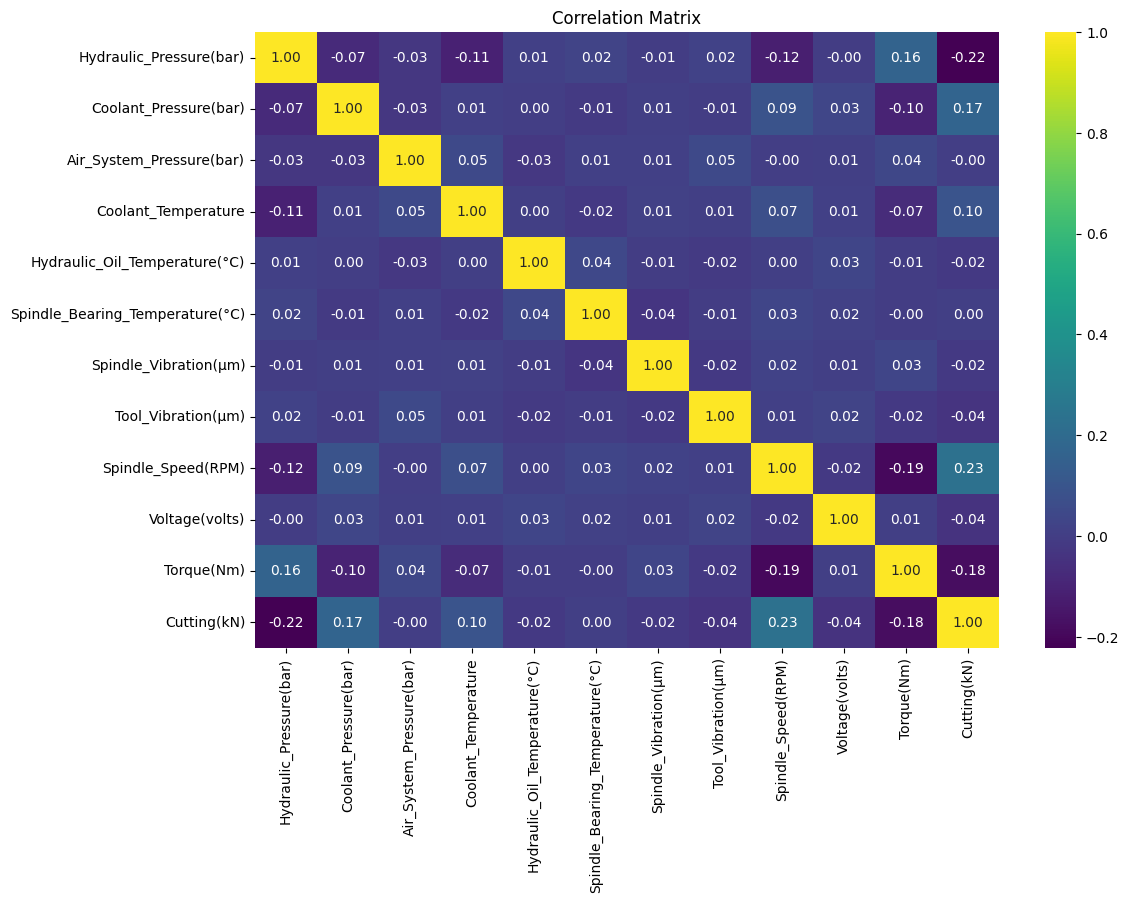

In [66]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

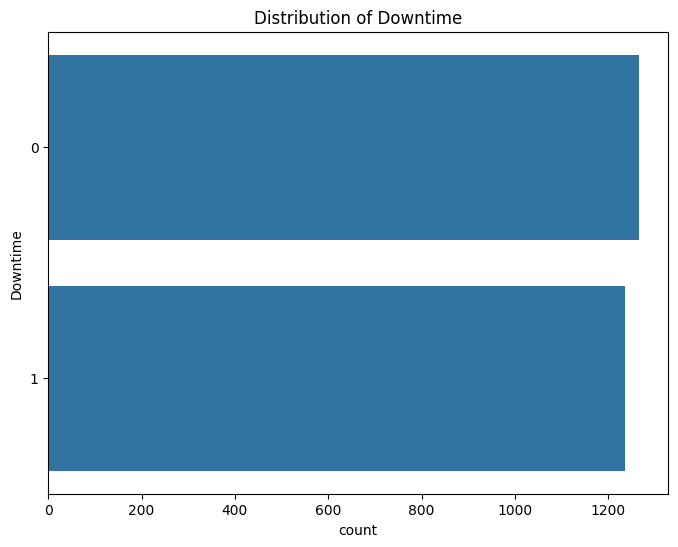

<Figure size 640x480 with 0 Axes>

In [44]:
# Distribution of Downtime
plt.figure(figsize=(8, 6))
sns.countplot(y='Downtime', data=data, orient='h')
plt.title('Distribution of Downtime')
plt.show()
plt.savefig("plott.png")

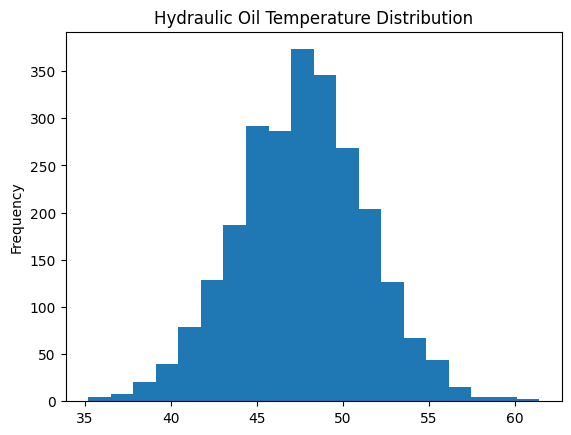

In [45]:
# Histograms
data['Hydraulic_Oil_Temperature(°C)'].plot(kind='hist', bins=20)
plt.title('Hydraulic Oil Temperature Distribution')
plt.show()

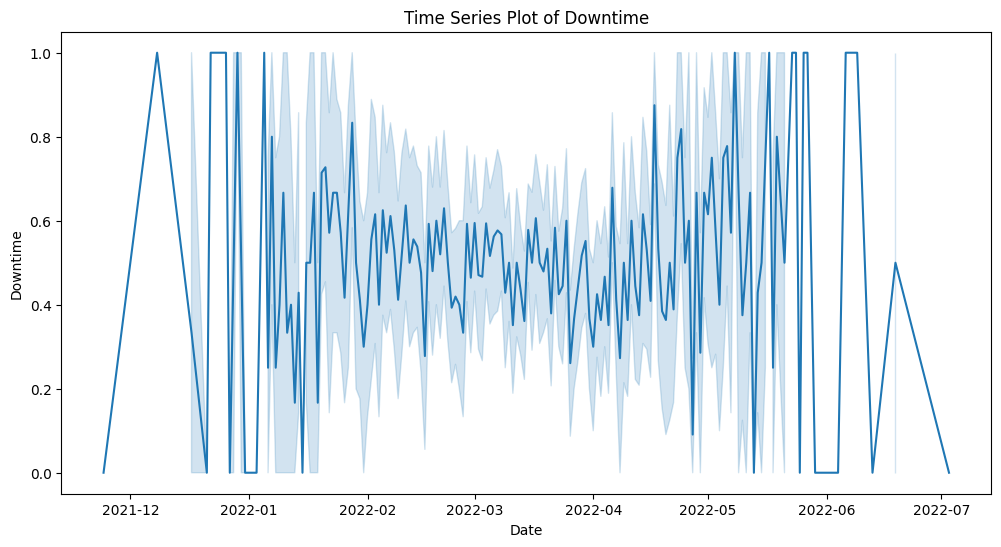

In [46]:
# Time Series Plots
plt.figure(figsize=(12, 6))

sns.lineplot(data=data, x='Date', y='Downtime')
plt.title('Time Series Plot of Downtime')
plt.xlabel('Date')
plt.ylabel('Downtime')

plt.show()

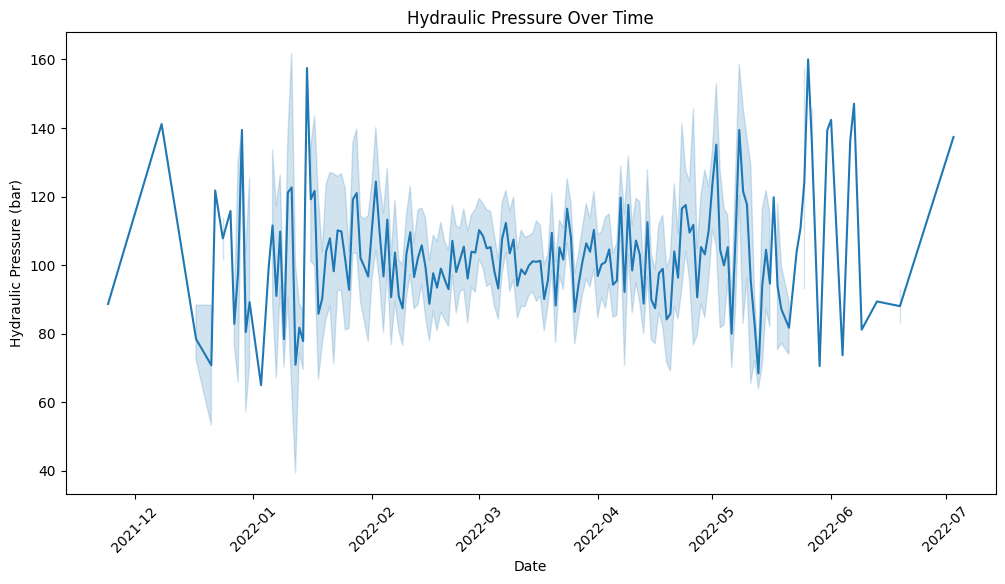

In [47]:
# Plot the hydraulic pressure over time
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="Hydraulic_Pressure(bar)", data=data)
plt.title("Hydraulic Pressure Over Time")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Hydraulic Pressure (bar)")
plt.show()

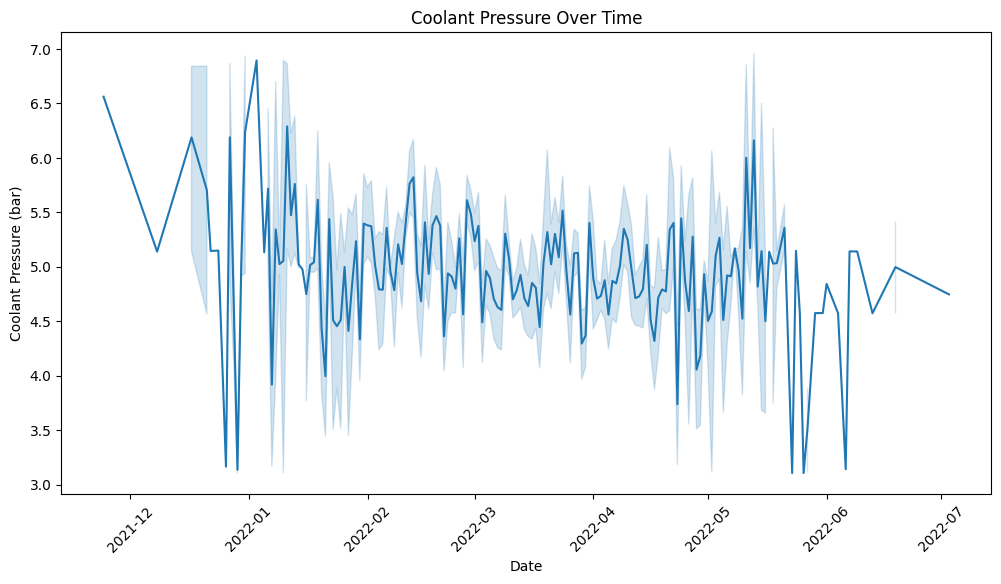

In [48]:
# Plot the coolant pressure over time
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="Coolant_Pressure(bar)", data=data)
plt.title("Coolant Pressure Over Time")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Coolant Pressure (bar)")
plt.show()

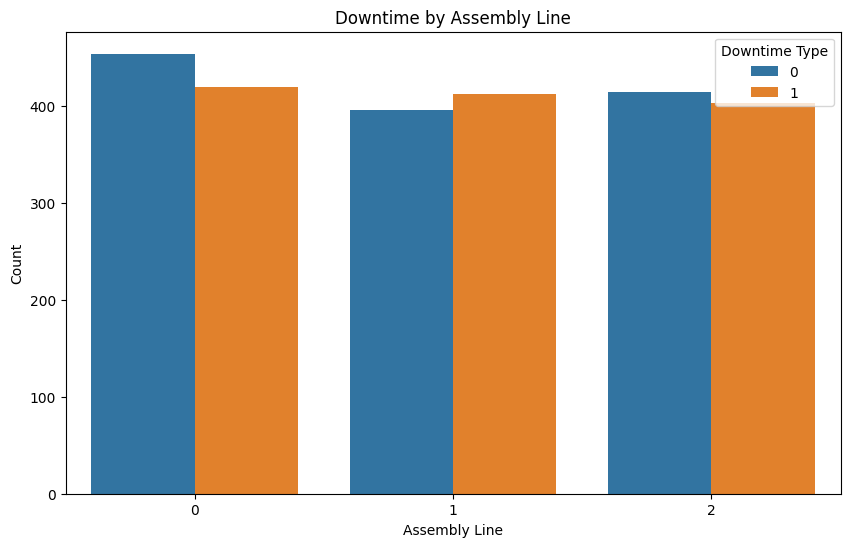

In [68]:
# Plot the machine downtime by assembly line
plt.figure(figsize=(10, 6))
sns.countplot(x="Assembly_Line_No", hue="Downtime", data=data)
plt.title("Downtime by Assembly Line")
plt.xlabel("Assembly Line")
plt.ylabel("Count")
plt.legend(title="Downtime Type")
plt.show()

In [51]:
# Calculate and display summary statistics
summary_stats = data.describe()
print(summary_stats)

                             Date   Machine_ID  Assembly_Line_No  \
count                        2500  2500.000000       2500.000000   
mean   2022-03-13 05:57:41.760000     0.977600          0.977600   
min           2021-11-24 00:00:00     0.000000          0.000000   
25%           2022-02-22 00:00:00     0.000000          0.000000   
50%           2022-03-14 00:00:00     1.000000          1.000000   
75%           2022-04-02 00:00:00     2.000000          2.000000   
max           2022-07-03 00:00:00     2.000000          2.000000   
std                           NaN     0.822538          0.822538   

       Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
count              2500.000000            2500.000000   
mean                101.409084               4.947058   
min                 -14.326454               0.325000   
25%                  76.470719               4.466685   
50%                  96.985000               4.947058   
75%                 126.301071               

In [52]:
# Finally, save the plots as images if required
# plt.savefig("1.png")